### Backtesting

In [11]:
import bt
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
bt_data = pd.read_csv('assets/qrm/qrm_portfolio.csv', index_col='date')

In [3]:
bt_data.index = pd.to_datetime(bt_data.index)

In [4]:
bt_data

,AAPL,AMZN,FB,GOOG,NFLX
date,,,,,
2015-01-02,101.1385,308.52,78.450,524.81,49.8485
2015-01-05,98.2893,302.19,77.190,513.87,47.3114
2015-01-06,98.2985,295.29,76.150,501.96,46.5014
2015-01-07,99.6769,298.42,76.150,501.10,46.7428
2015-01-08,103.5067,300.46,78.175,502.68,47.7792
...,...,...,...,...,...
2019-03-25,188.0160,1774.26,166.290,1193.00,366.2300
2019-03-26,186.0735,1783.76,167.680,1184.62,359.9700
2019-03-27,187.7470,1765.70,165.870,1173.02,353.3700


In [5]:
# Define the strategy
bt_strategy = bt.Strategy('Trade_Weekly', 
                         [bt.algos.RunWeekly(),
                          bt.algos.SelectAll(),
                          bt.algos.WeighEqually(),
                          bt.algos.Rebalance()])
# Create a backtest
bt_test = bt.Backtest(bt_strategy, bt_data)
bt_test.data = bt_test.data.dropna()
bt_test.dates = bt_test.data.index

# Run the backtest
bt_res = bt.run(bt_test)
# Plot the test result
bt_res.plot(title="Backtest result")
plt.show()

/Users/lazaros/opt/anaconda3/lib/python3.8/site-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
/Users/lazaros/opt/anaconda3/lib/python3.8/site-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
<ipython-input-5-aa432dd26243>:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


<AxesSubplot:title={'center':'Backtest result'}>

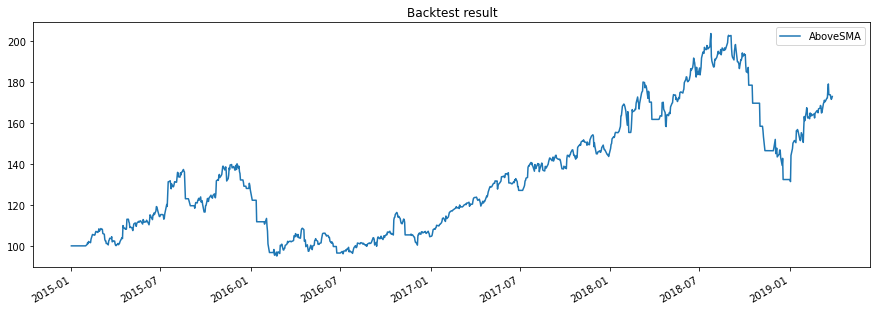

In [14]:
# Calculate the SMA
sma = bt_data.rolling(20).mean()

# Define the strategy
bt_strategy = bt.Strategy('AboveSMA', 
                          [bt.algos.SelectWhere(bt_data > sma),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])

# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, bt_data)
bt_result = bt.run(bt_backtest)
# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()


In [1]:
# # Calculate the EMA
# ema['Close'] = talib.EMA(price_data['Close'], timeperiod=20)

# # Define the strategy
# bt_strategy = bt.Strategy('AboveEMA',
#                           [bt.algos.SelectWhere(price_data > ema),
#                            bt.algos.WeighEqually(),
#                            bt.algos.Rebalance()])

# # Create the backtest and run it
# bt_backtest = bt.Backtest(bt_strategy, price_data)
# bt_result = bt.run(bt_backtest)
# # Plot the backtest result
# bt_result.plot(title='Backtest result')
# plt.show()

In [2]:
# # Construct the signal
# signal[EMA_short > EMA_long] = 1
# signal[EMA_short < EMA_long] = -1

# # Merge the data 
# combined_df = bt.merge(signal, price_data, EMA_short, EMA_long)
# combined_df.columns = ['signal', 'Price', 'EMA_short', 'EMA_long']
# # Plot the signal, price and MAs
# combined_df.plot(secondary_y=['signal'])
# plt.show()

In [3]:
# # Define the strategy
# bt_strategy = bt.Strategy('EMA_crossover', 
#                           [bt.algos.WeighTarget(signal),
#                            bt.algos.Rebalance()])

# # Create the backtest and run it
# bt_backtest = bt.Backtest(bt_strategy, price_data)
# bt_result = bt.run(bt_backtest)

# # Plot the backtest result
# bt_result.plot(title='Backtest result')
# plt.show()

### Benchmarking against buy and hold

In [ ]:
def signal_strategy(price_data, period, name):
    # Calculate SMA
    sma = price_data.rolling(period).mean()
    # Define the signal-based Strategy
    bt_strategy = bt.Strategy(name, 
                              [bt.algos.SelectWhere(price_data>sma),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])
    # Return the backtest
    return bt.Backtest(bt_strategy, price_data)

# Create signal strategy backtest
sma10 = signal_strategy(price_data, period=10, name='SMA10')
sma30 = signal_strategy(price_data, period=30, name='SMA30')
sma50 = signal_strategy(price_data, period=50, name='SMA50')

# Run all backtests and plot the resutls
bt_results = bt.run(sma10, sma30, sma50)
bt_results.plot(title='Strategy optimization')
plt.show()


def buy_and_hold(price_data, name):
    # Define the benchmark strategy
    bt_strategy = bt.Strategy(name, 
                              [bt.algos.RunOnce(),
                               bt.algos.SelectAll(),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])
   # Return the backtest
    return bt.Backtest(bt_strategy, price_data)

# Create benchmark strategy backtest
benchmark = buy_and_hold(price_data, name='benchmark')

# Run all backtests and plot the resutls
bt_results = bt.run(sma10, sma30, sma50, benchmark)
bt_results.plot(title='Strategy benchmarking')
plt.show()

### TA-lib

In [ ]:
# # Calculate the SMA
# stock_data['SMA'] = talib.SMA(stock_data['Close'], timeperiod=50)
# # Calculate the EMA
# stock_data['EMA'] = talib.EMA(stock_data['Close'], timeperiod=50)

# # Plot the SMA, EMA with price
# plt.plot(stock_data['SMA'], label='SMA')
# plt.plot(stock_data['EMA'], label='EMA')
# plt.plot(stock_data['Close'], label='Close')

# # Customize and show the plot
# plt.legend()
# plt.title('SMA vs EMA')
# plt.show()

# # Calculate the ADX with the default time period
# stock_data['ADX_14'] = talib.ADX(stock_data['High'],
#                                  stock_data['Low'], 
#                                  stock_data['Close'])

# # Calculate the ADX with the time period set to 21
# stock_data['ADX_21'] = talib.ADX(stock_data['High'],
#                                  stock_data['Low'], 
#                                  stock_data['Close'], 
#                                  timeperiod=21)
# # Print the last five rows
# print(stock_data.tail())

# # Calculate RSI with the default time period
# stock_data['RSI_14'] = talib.RSI(stock_data['Close'])

# # Calculate RSI with a time period of 21
# stock_data['RSI_21'] = talib.RSI(stock_data['Close'], timeperiod=21) 

# # Print the last five rows
# print(stock_data.tail())


# # Define the Bollinger Bands with 1-sd
# upper_1sd, mid_1sd, lower_1sd = talib.BBANDS(bitcoin_data['Close'],
#                                              nbdevup=1,
#                                              nbdevdn=1,
#                                              timeperiod=20)
# # Plot the upper and lower Bollinger Bands 
# plt.plot(bitcoin_data['Close'], color='green', label='Price')
# plt.plot(upper_1sd, color='tomato', label="Upper 1sd")
# plt.plot(lower_1sd, color='tomato', label='Lower 1sd')

# # Customize and show the plot
# plt.legend(loc='upper left')
# plt.title('Bollinger Bands (1sd)')
# plt.show()


# # Define the Bollinger Bands with 2-sd
# upper_2sd, mid_2sd, lower_2sd = talib.BBANDS(bitcoin_data['Close'],
#                                              nbdevup=2,
#                                              nbdevdn=2,
#                                              timeperiod=20)
# # Plot the upper and lower Bollinger Bands 
# plt.plot(bitcoin_data['Close'], color='green', label='Price')
# plt.plot(upper_2sd, color='orange', label='Upper 2sd')
# plt.plot(lower_2sd, color='orange', label='Lower 2sd')

# # Customize and show the plot
# plt.legend(loc='upper left')
# plt.title('Bollinger Bands (2sd)')
# plt.show()